In [1]:
import numpy as np
import preprocessing as pre
from decision_tree import DecisionTree
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import recall_score, precision_score, f1_score, confusion_matrix

In [15]:
x, y = pre.load_data('../data/fashion_train.npy')

x_processed, pca = pre.preprocess(x)

X_train, X_test, y_train, y_test = train_test_split(x_processed, y, test_size=0.2, random_state=42, stratify=y)


In [16]:
import pickle


with open('./models/pca_65.pkl', 'wb') as f:
    pickle.dump(pca, f)

# Find best hyperparameter

In [7]:
#grindsearch

from sklearn.model_selection import GridSearchCV, StratifiedShuffleSplit
from sklearn.tree import DecisionTreeClassifier

max_depth = [3, 5, 7, 9, 11]

min_samples_split = [2, 3, 4, 5]


param_grid = dict(max_depth=max_depth, min_samples_split=min_samples_split)
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
grid = GridSearchCV(DecisionTreeClassifier(), param_grid=param_grid, cv=cv)
grid.fit(X_train, y_train)

print(
    "The best parameters are %s with a score of %0.4f"
    % (grid.best_params_, grid.best_score_)
)





The best parameters are {'max_depth': 7, 'min_samples_split': 5} with a score of 0.7814


# Make final model with best parameter

In [13]:
dt = DecisionTree(max_depth=7, min_samples_split=5)
dt.fit(X_train, y_train)

In [4]:
#load test data

pred = dt.predict(X_test)

acc = np.sum(pred == y_test) / len(y_test)

print(f'Accuracy: {acc*100:.2f}%')

Accuracy: 78.55%


In [5]:
import pickle

with open('./models/decision_tree_model.pkl', 'wb') as f:
    pickle.dump(dt, f)

# Compute the accuracy and std

In [23]:
from sklearn.metrics import recall_score, precision_score, f1_score, confusion_matrix

In [ ]:
x, y = pre.load_data('../data/fashion_test.npy')

pca_65 = pickle.load(open('./models/pca_65.pkl', 'rb'))

x_processed = pre.preprocess(x, pca=pca_65)

model = pickle.load(open('models/decision_tree_model.pkl', 'rb'))

df = pd.DataFrame(x_processed)
df['y'] = y

acc_list = []
recall_score_list = []
precision_score_list = []
f1_score_list = []
matrix = np.zeros((5, 5))

for x in range(0, 1000):
    sample = df.sample(1000, replace=True)
    X = sample.iloc[:,:-1].to_numpy()
    y = sample.iloc[:,-1].to_numpy()
    preds = model.predict(X)
    accuracy = np.sum(preds == y) / len(y)
    recall_score_list.append(recall_score(y, preds, average='weighted'))
    precision_score_list.append(precision_score(y, preds, average='weighted'))
    f1_score_list.append(f1_score(y, preds, average='weighted'))
    acc_list.append(accuracy)
    matrix += confusion_matrix(y, preds)

print(f'accuracy: {round(np.mean(acc_list)*100, 2)}% ± {round(np.std(acc_list)*100, 2)}%')
print(f'recall: {round(np.mean(recall_score_list)*100, 2)}% ± {round(np.std(recall_score_list)*100, 2)}%')
print(f'precision: {round(np.mean(precision_score_list)*100, 2)}% ± {round(np.std(precision_score_list)*100, 2)}%')
print(f'f1: {round(np.mean(f1_score_list)*100, 2)}% ± {round(np.std(f1_score_list)*100, 2)}%')
print('confusion matrix:\n', (matrix/1000)/np.sum(matrix/1000, axis=1)[:, np.newaxis])

accuracy: 76.95% ± 1.34%
recall: 76.95% ± 1.34%
precision: 77.01% ± 1.35%
f1: 76.73% ± 1.36%
confusion matrix:
 [[153.346   1.069   7.231  15.111  22.751]
 [  4.55  181.771   3.169   8.819   1.992]
 [  5.377   0.187 162.17    4.188  28.17 ]
 [ 14.279   3.34    5.195 168.57    8.979]
 [ 38.802   0.434  47.501   9.394 103.605]]


Text(0.5, 36.72222222222221, 'Predicted Label')

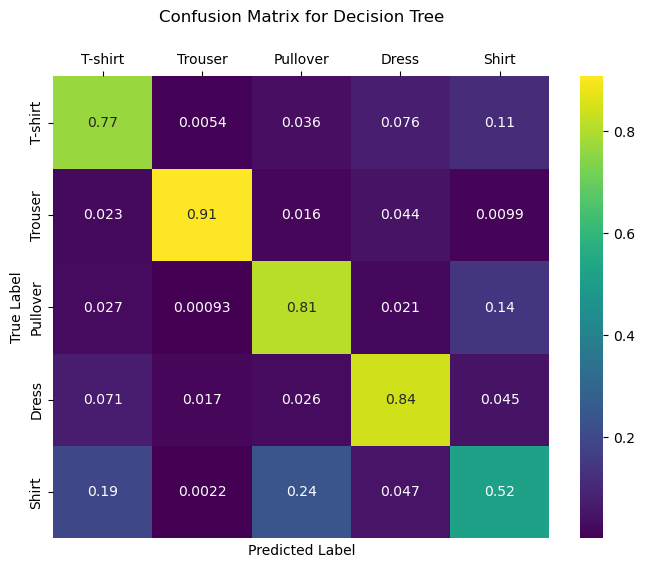

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
# Convert the matrix to a pandas DataFrame

matrix_c = (matrix/1000)/np.sum(matrix/1000, axis=1)[:, np.newaxis]
# Row and column labels
row_labels = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Shirt']
column_labels = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Shirt']

# Convert the matrix to a pandas DataFrame with labels
df = pd.DataFrame(matrix_c, index=row_labels, columns=column_labels)

# Create a heatmap
plt.figure(figsize=(8, 6))
ax = sns.heatmap(df, annot=True, cmap='viridis', cbar=True)

# Move x-axis labels to the top
ax.xaxis.set_ticks_position('top')  # Set x-axis ticks to top
ax.xaxis.tick_top()  # Move the x-axis labels to the top

# Add title and labels
plt.title("Confusion Matrix for Decision Tree", y=1.1)  # Adjust title position
plt.ylabel("True Label")
plt.xlabel("Predicted Label")

# Compare with sklearn Decision tree

# Train

In [20]:
from sklearn.tree import DecisionTreeClassifier



sklearn_dt = DecisionTreeClassifier(max_depth=7, min_samples_split=5, criterion='gini', random_state=42)
sklearn_dt.fit(X_train, y_train)

pred = sklearn_dt.predict(X_test)

acc = np.sum(pred == y_test) / len(y_test)

print(f'Accuracy: {acc*100:.2f}%')


Accuracy: 78.50%


# Compute the accuracy and std for sklearn model

In [21]:
x, y = pre.load_data('../data/fashion_test.npy')

pca_65 = pickle.load(open('./models/pca_65.pkl', 'rb'))

x_processed = pre.preprocess(x, pca=pca_65)

model = sklearn_dt

df = pd.DataFrame(df)
df['y'] = y

acc_list = []

for x in range(0, 1000):
    sample = df.sample(1000, replace=True)
    X = sample.iloc[:,:-1].to_numpy()
    y = sample.iloc[:,-1].to_numpy()
    preds = model.predict(X)
    accuracy = np.sum(preds == y) / len(y)
    acc_list.append(accuracy)

print(f'accuracy: {round(np.mean(acc_list)*100, 2)}% ± {round(np.std(acc_list)*100, 2)}%')

accuracy: 77.03% ± 1.32%
